copiler main: g++ -std=c++17 -I/usr/include/eigen3 *.cpp -o main -lboost_filesystem -lboost_system -lz

compiler cluster: g++ -std=c++17     -I/home/lrdsilva/local/include     -L/home/lrdsilva/local/lib     -Wl,-rpath=/home/lrdsilva/local/lib     *.cpp -o main     -lboost_filesystem -lboost_system -lz

In [1]:
import matplotlib as mpl 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit, root_scalar
from numpy.linalg import inv
from matplotlib import cm
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from matplotlib.colors import LinearSegmentedColormap

import os
import glob
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from scipy.stats import linregress
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import eigsh
import scipy.sparse.linalg as spla
from scipy.sparse import csr_matrix
import sys

import os.path
dir = os.getcwd()


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

GREY12 = "#1f1f1f"
plt.rcParams.update({"font.family": "Bell MT"})
plt.rcParams["text.color"] = GREY12
plt.rc("axes", unicode_minus=False)

def setlabel(ax, label, loc=2, borderpad=0.6, **kwargs):
    legend = ax.get_legend()
    if legend:
        ax.add_artist(legend)
    line, = ax.plot(np.NaN,np.NaN,color='none',label=label)
    label_legend = ax.legend(handles=[line],loc=loc,handlelength=0,handleheight=0,
                             handletextpad=0,borderaxespad=0,borderpad=borderpad,**kwargs)
    label_legend.remove()
    ax.add_artist(label_legend)
    line.remove()

def detalhes(ax, loc, aux = True, ncol = 1):
    if aux:
        ax.legend(numpoints = 1, borderpad = .45, handlelength = 1.5, handletextpad = .6, labelspacing = 0.3, 
                  loc = loc, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
                  fontsize = 12, ncol = ncol)
    ax.minorticks_on()
    ax.tick_params(axis = 'both', labelsize = 12,
                  length = 3, width = 1., colors='black', pad = 5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis = 'both', which = 'major',
                  direction = 'in', length = 5, width = .8, colors='black')
    ax.tick_params(axis = 'both', which = 'minor',
                  direction = 'in', length = 2, width = .8, colors='black',
                  top=True, right=True)
    for spine in ax.spines.values():
        spine.set_linewidth(.6)

In [ ]:
import numpy as np
import sys
import random
import subprocess
import os.path
dir = os.getcwd()


dim = int(sys.argv[1])
n = int(sys.argv[2])
passo = int(sys.argv[3])

alpha_a = 2. # alpha_A
alphas = np.arange(.5, 10.5, .5) # \alpha_g

arq = os.path.join("%s/%dd_n_%d_alpha_%.2lf.sh" % (dir, dim, n, alpha_f))
file = open(arq, "w")
file.write("#!/bin/sh\n")

for alpha_g in alphas:
    for qini, samples in zip(np.arange(1, 1000+passo, passo), np.arange(passo, 1000+passo, passo)):
        arq = os.path.join("%s/script/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_qini_%d_samples_%d.sh" % (dir, dim, n, alpha_a, alpha_g, qini, samples))
        f = open(arq, "w")
        f.write("#!/bin/sh\n")
        f.write("#SBATCH --partition=amd-512\n")
        f.write("##SBATCH --mail-type=ALL\n")
        f.write("#SBATCH --time=00-05:00\n")
        f.write("#SBATCH --qos=preempt\n")
        f.write("#SBATCH --cpus-per-task=8\n")
        f.write("#SBATCH --hint=compute_bound\n")
        f.write("export OMP_NUM_THREADS=1\n")
        f.write("#SBATCH --nodes=1\n")
        f.write("./main %d %d %.2lf %.2lf %d %d&\n" % (dim, n, alpha_a, alpha_g, samples, qini))
        f.write("wait\n")
        file.write("sbatch %s/script/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_qini_%d_samples_%d.sh\n" % (dir, dim, n, alpha_a, alpha_g, qini, samples))

file.close()

# 1. Distribuição de distâncias dentre os pares conectados

In [ ]:
import numpy as np
import sys
import random
import subprocess
import os.path
dir = os.getcwd()


dim = int(sys.argv[1])
n = int(sys.argv[2])
passo = int(sys.argv[3])

samples = 1000
alpha_a = 2. # alpha_A
alpha_g = 2.
alphas = [1, 2, 3, 4, 5]

arq = os.path.join("%s/distances_%dd_n_%d_alpha_A_%.2lf.sh" % (dir, dim, n, alpha_a))
file = open(arq, "w")
file.write("#!/bin/sh\n")

for alpha_g in alphas:
    for qini, samples in zip(np.arange(1, 1000+passo, passo), np.arange(passo, 1000+passo, passo)):
        arq = os.path.join("%s/script/distances_%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samples_%d.sh" % (dir, dim, n, alpha_a, alpha_g, samples))
        f = open(arq, "w")
        f.write("#!/bin/sh\n")
        f.write("#SBATCH --partition=amd-512\n")
        f.write("##SBATCH --mail-type=ALL\n")
        f.write("#SBATCH --time=00-30:00\n")
        f.write("#SBATCH --qos=preempt\n")
        f.write("#SBATCH --cpus-per-task=8\n")
        f.write("#SBATCH --hint=compute_bound\n")
        f.write("export OMP_NUM_THREADS=1\n")
        f.write("#SBATCH --nodes=1\n")
        f.write("python edge_distances.py %d %d %.2lf %.2lf %d %d&\n" % (dim, n, alpha_a, alpha_g, samples, qini))
        f.write("wait\n")
        file.write("sbatch %s/script/distances_%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samples_%d.sh\n" % (dir, dim, n, alpha_a, alpha_g, samples))

file.close()


## 1.1 Arquivos com as distâncias entre os sítios conectados

In [61]:
import numpy as np
import igraph as ig
import networkx as nx
import sys
import random
import subprocess
import os.path
dir = os.getcwd()

dim = 4 #int(sys.argv[1])
ordem = 10000 #int(sys.argv[2])
alpha_a = 2. #float(sys.argv[3])
alpha_g = 2. #float(sys.argv[4])
samples = 1 #int(sys.argv[5])
qini = 1000 #int(sys.argv[6])

files = 'data/dim_%d/N_%d/alpha_g_%.2lf/alpha_a_%.2lf/gml' % (dim, ordem, alpha_g, alpha_a)
distances = []
for q in range(qini, samples + 1):
    arq = '%s/gml_%d.gml' % (files, q)
    
    if not os.path.exists(arq):
        print(f"Aviso: arquivo {arq} não encontrado. Pulando.")
        continue
        
    G = nx.read_gml(arq)
    
    pos = {}
    for node, data in G.nodes(data=True):
        gfx = data.get("graphics", {})
        coords = []
        # always take the first `d` coords in order
        for key in ("x","y","z","q")[:dim]:
            coords.append(float(gfx.get(key, 0.0)))
        pos[node] = np.array(coords)
    edge_distances = []
    for u, v in G.edges():
        if dim == 1:
            # in 1D, just absolute difference of x
            dist = abs(pos[u][0] - pos[v][0])
        else:
            # full Euclidean in d‐dimensions
            dist = np.linalg.norm(pos[u] - pos[v])
        edge_distances.append(dist)

    arq = "data/distance_distribution/distances/dim_%d/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_amo_%d.npz" % (dim, dim, ordem, alpha_a, alpha_g, q)
    np.savez(arq, edge_distances = edge_distances)

## 1.2 Distribuição de distâncias dos arquivos com as distâncias entre os sítios conectados

In [12]:
import numpy as np
import igraph as ig
import networkx as nx
import sys
import random
import subprocess
import os.path
dir = os.getcwd()

dim = int(sys.argv[1])
ordem = int(sys.argv[2])
alpha_a = float(sys.argv[3])
alpha_g = float(sys.argv[4])

samples = 1000
qini = 1

distances = []
for q in range(qini, samples + 1):
    data = np.load("data/distance_distribution/distances/dim_%d/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_amo_%d.npz" % (dim, dim, ordem, alpha_a, alpha_g, q))
    edge_distances = data["edge_distances"]
    distances.extend(edge_distances)

bins = np.logspace(np.log10(min(distances)), np.log10(max(distances)), 30)
pdf, bin_edges = np.histogram(distances, bins = bins, density = True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
bin_widhs = bin_edges[1:] - bin_edges[:-1]
pdf = np.array(pdf) / sum(pdf)

arq = "data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples)
np.savez(arq, bins = bins, bin_centers = bin_centers, bin_widhs = bin_widhs, pdf = pdf)

In [13]:
# alpha_g_values = [1, 2, 3, 4, 5] com alpha_A = 2
# alpha_a_values = [2, 3, 4, 5, 6, 7, 8] com alpha_G = 2
# n = 10000
# dimensions = [1, 2, 3, 4]

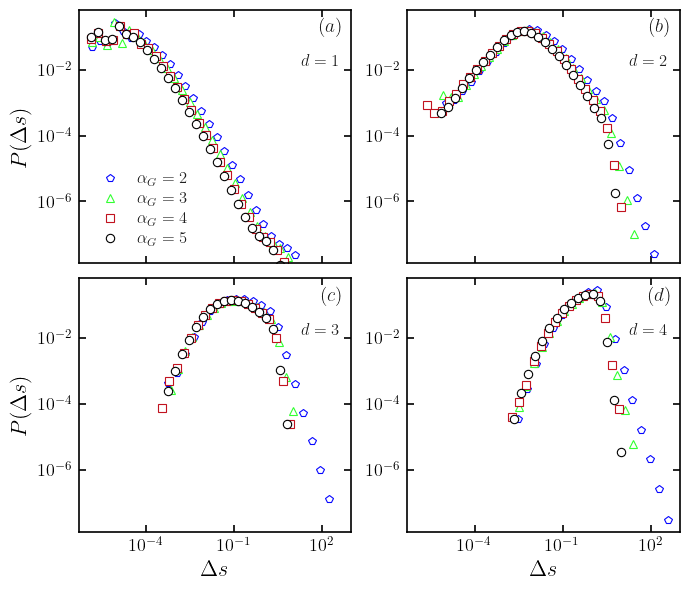

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
axs = axs.flatten()

dim = 1
n = 10000
alpha_a = 2.
alpha_g_values = [2, 3, 4, 5]
samples = 1000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, dim in zip(axs, [1, 2, 3, 4]):
    for i,alpha_g in enumerate(alpha_g_values):
        data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples))
        bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
        pdf = np.array(pdf) / sum(pdf)
        ax.plot(bin_centers, pdf, marker=markers[i], color=colors[i], lw = 0, #bins[:-1]
                markerfacecolor='white', markeredgewidth=.8,
                label = r'$\alpha_G = %d$' % alpha_g)
    setlabel(ax, r'$d = %d$' % (dim), loc=1, borderpad=0.4, fontsize = 12, fancybox = True, 
             framealpha = 0, shadow = False, bbox_to_anchor=[.98, 0.85])

axs[0].legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
          loc = 3, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
          fontsize = 12, ncol = 1)#, bbox_to_anchor=[0, 0])

for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([10**-6, 10**3])
    # ax.set_ylim([10**-5, 10**5])
    if ax in [axs[2], axs[3]]:
        ax.set_xlabel(r'$\Delta s$', fontsize=16)
    if ax in [axs[0], axs[2]]:
        ax.set_ylabel(r'$P(\Delta s)$', fontsize=16)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)#, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/distances_distribution_alpha_G.pdf', bbox_inches='tight')
plt.show()

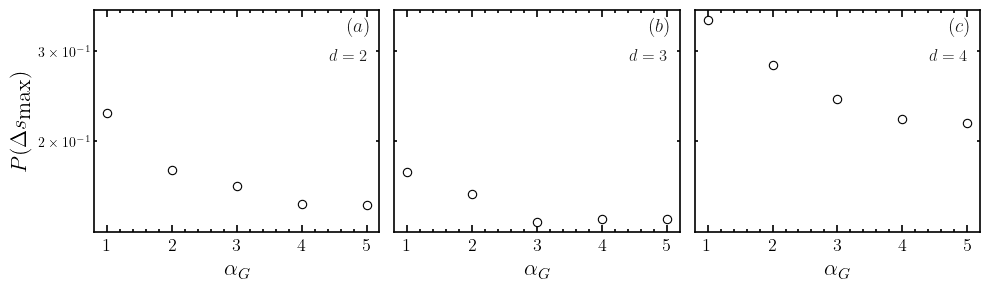

In [102]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
axs = axs.flatten()

dim = 1
n = 10000
alpha_a = 2.
alpha_g_values = [1, 2, 3, 4, 5]
samples = 1000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, dim in zip(axs, [2, 3, 4]):
    delta = []
    for alpha_g in alpha_g_values:
        data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples))
        bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
        pdf = np.array(pdf) / sum(pdf)
        idx_max = np.argmax(pdf)
        x_max_pdf = bin_centers[idx_max]
        y_max_pdf = pdf[idx_max]
        delta.append(y_max_pdf)
    ax.plot(alpha_g_values, delta, marker='o', color='#000000', lw = 0,
            markerfacecolor='white', markeredgewidth=.8,
            label = r'$\alpha_G = %d$' % alpha_g)
    setlabel(ax, r'$d = %d$' % (dim), loc=1, borderpad=0.4, fontsize = 12, fancybox = True, 
             framealpha = 0, shadow = False, bbox_to_anchor=[.98, 0.85])

for ax in axs:
    # ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([10**-6, 10**3])
    # ax.set_ylim([10**-5, 10**5])
    ax.set_xlabel(r'$\alpha_G$', fontsize=16)
    if ax == axs[0]:
        ax.set_ylabel(r'$P(\Delta s_{\mbox{max}})$', fontsize=16)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)#, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
# setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/distances_distribution_alpha_G.pdf', bbox_inches='tight')
plt.show()

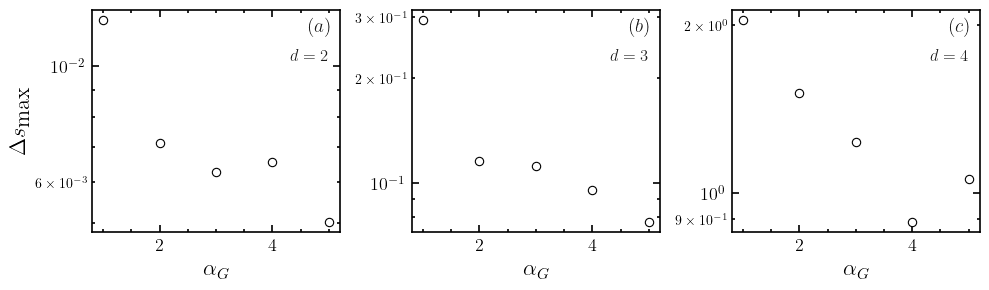

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=False)
axs = axs.flatten()

dim = 1
n = 10000
alpha_a = 2.
alpha_g_values = [1, 2, 3, 4, 5]
samples = 1000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, dim in zip(axs, [2, 3, 4]):
    delta = []
    for alpha_g in alpha_g_values:
        data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples))
        bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
        pdf = np.array(pdf) / sum(pdf)
        idx_max = np.argmax(pdf)
        x_max_pdf = bin_centers[idx_max]
        y_max_pdf = pdf[idx_max]
        delta.append(x_max_pdf)
    ax.plot(alpha_g_values, delta, marker='o', color='#000000', lw = 0,
            markerfacecolor='white', markeredgewidth=.8,
            label = r'$\alpha_G = %d$' % alpha_g)
    setlabel(ax, r'$d = %d$' % (dim), loc=1, borderpad=0.4, fontsize = 12, fancybox = True, 
             framealpha = 0, shadow = False, bbox_to_anchor=[.98, 0.85])

for ax in axs:
    # ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([10**-6, 10**3])
    # ax.set_ylim([10**-5, 10**5])
    ax.set_xlabel(r'$\alpha_G$', fontsize=16)
    if ax == axs[0]:
        ax.set_ylabel(r'$\Delta s_{\mbox{max}}$', fontsize=16)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)#, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
# setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/distances_distribution_alpha_G.pdf', bbox_inches='tight')
plt.show()

Realmente, o parâmetro que controla as distânciais/posições na rede é o alpha_G, então a distribuição de distâncias deve mudar com alpha_G, mas já alpha_A controla as ligações, quando o sítio entra ele primeiro é adicionado a posição para depois escolher com quem vai se ligar.

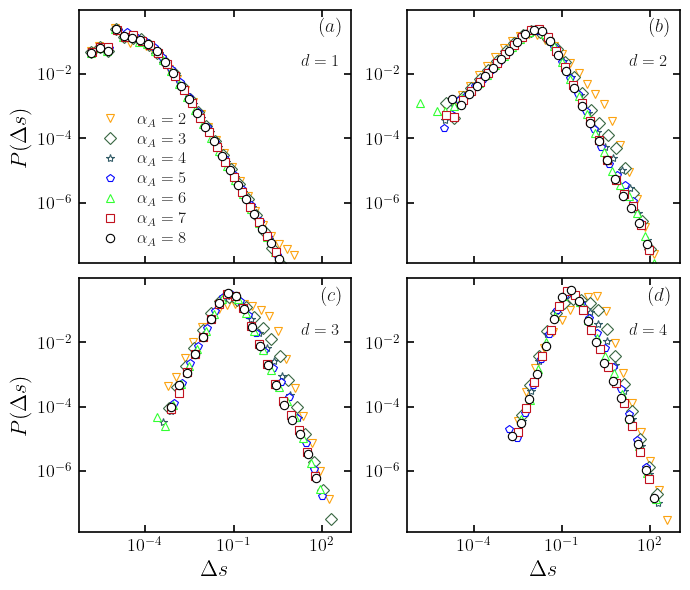

In [85]:
fig, axs = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
axs = axs.flatten()

dim = 1
n = 10000
alpha_g = 2.
alpha_a_values = [2, 3, 4, 5, 6, 7, 8]
samples = 1000

colors = ['#fca311', '#386641', '#335c67', '#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['v', 'D', '*', 'p', '^', 's', 'o']

for ax, dim in zip(axs, [1, 2, 3, 4]):
    for i,alpha_a in enumerate(alpha_a_values):
        data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples))
        bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
        pdf = np.array(pdf) / sum(pdf)
        ax.plot(bin_centers, pdf, marker=markers[i], color=colors[i], lw = 0, #bins[:-1]
                markerfacecolor='white', markeredgewidth=.8,
                label = r'$\alpha_A = %d$' % alpha_a)
    setlabel(ax, r'$d = %d$' % (dim), loc=1, borderpad=0.4, fontsize = 12, fancybox = True, 
             framealpha = 0, shadow = False, bbox_to_anchor=[.98, 0.85])

axs[0].legend(numpoints = 1, borderpad = .5, handlelength = 1.8, handletextpad = .7, labelspacing = 0.3, 
          loc = 3, fancybox = True, framealpha = 0, shadow = False, facecolor = "white", 
          fontsize = 12, ncol = 1)#, bbox_to_anchor=[0, 0])

for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([10**-6, 10**3])
    # ax.set_ylim([10**-5, 10**5])
    if ax in [axs[2], axs[3]]:
        ax.set_xlabel(r'$\Delta s$', fontsize=16)
    if ax in [axs[0], axs[2]]:
        ax.set_ylabel(r'$P(\Delta s)$', fontsize=16)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)#, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
plt.savefig('img/distances_distribution_alpha_A.pdf', bbox_inches='tight')
plt.show()

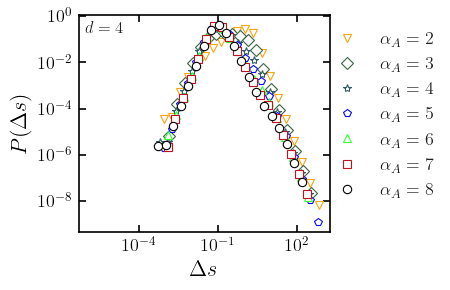

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(3.5, 3), sharex=True, sharey=True)

dim = 4
n = 100000
alpha_g = 2.
alpha_a_values = [2, 3, 4, 5, 6, 7, 8]
samples = 1000

colors = ['#fca311', '#386641', '#335c67', '#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['v', 'D', '*', 'p', '^', 's', 'o']

handles = []  # para armazenar as curvas com legenda
labels = []   # para armazenar os rótulos
for i,alpha_a in enumerate(alpha_a_values):
    data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, n, alpha_a, alpha_g, samples))
    bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
    pdf = np.array(pdf) / sum(pdf)
    line = ax.plot(bin_centers, pdf, marker=markers[i], color=colors[i], lw = 0, #bins[:-1]
            markerfacecolor='white', markeredgewidth=.8, label = r'$\alpha_A = %d$' % alpha_a)
    handles.append(line[0])
    labels.append(r'$\alpha_A = %d$' % alpha_a)
    
setlabel(ax, r'$d = %d$' % (dim), loc=2, borderpad=0.4, fontsize = 12, fancybox = True, 
         framealpha = 0, shadow = False)

fig.legend(handles, labels, fancybox=True, framealpha=0.0, fontsize=13,
           loc='center right', bbox_to_anchor=(1.3, .6), ncol=1)

ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim([10**-6, 10**3])
# ax.set_ylim([10**-5, 10**5])
ax.set_xlabel(r'$\Delta s$', fontsize=16)
ax.set_ylabel(r'$P(\Delta s)$', fontsize=16)
ax.minorticks_on()
ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
               labelleft=True, top=True, bottom=True, left=True, right=True)
ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(1.2)

plt.tight_layout()
# plt.savefig('img/4d_distances_distribution_alpha_G_2.png', bbox_inches='tight', dpi = 300)
plt.show()

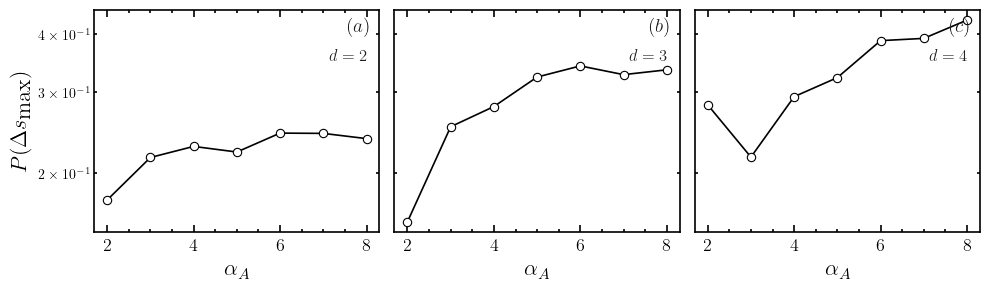

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
axs = axs.flatten()

dim = 1
n = 10000
alpha_g = 2.
alpha_a_values = [2, 3, 4, 5, 6, 7, 8]
samples = 1000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, dim in zip(axs, [2, 3, 4]):
    delta = []
    for alpha_a in alpha_a_values:
        data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples))
        bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
        pdf = np.array(pdf) / sum(pdf)
        idx_max = np.argmax(pdf)
        x_max_pdf = bin_centers[idx_max]
        y_max_pdf = pdf[idx_max]
        delta.append(y_max_pdf)
    ax.plot(alpha_a_values, delta, marker='o', color='#000000', lw = 1.2,
            markerfacecolor='white', markeredgewidth=.8)
    setlabel(ax, r'$d = %d$' % (dim), loc=1, borderpad=0.4, fontsize = 12, fancybox = True, 
             framealpha = 0, shadow = False, bbox_to_anchor=[.98, 0.85])

for ax in axs:
    # ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([10**-6, 10**3])
    # ax.set_ylim([10**-5, 10**5])
    ax.set_xlabel(r'$\alpha_A$', fontsize=16)
    if ax == axs[0]:
        ax.set_ylabel(r'$P(\Delta s_{\mbox{max}})$', fontsize=16)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)#, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
# setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/distances_distribution_alpha_G.pdf', bbox_inches='tight')
plt.show()

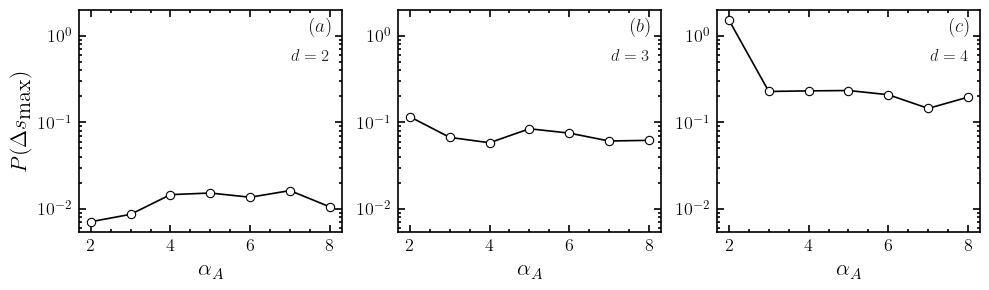

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharex=True, sharey=True)
axs = axs.flatten()

dim = 1
n = 10000
alpha_g = 2.
alpha_a_values = [2, 3, 4, 5, 6, 7, 8]
samples = 1000

colors = ['#0606ff', '#32ff32', '#c1121f', '#000000']
markers = ['p', '^', 's', 'o']

for ax, dim in zip(axs, [2, 3, 4]):
    delta = []
    for alpha_a in alpha_a_values:
        data = np.load("data/distance_distribution/%dd_n_%d_alpha_A_%.2lf_alpha_G_%.2lf_samles_%d.npz" % (dim, ordem, alpha_a, alpha_g, samples))
        bins, bin_centers, bin_widhs, pdf = data["bins"], data["bin_centers"], data["bin_widhs"], data["pdf"]
        pdf = np.array(pdf) / sum(pdf)
        idx_max = np.argmax(pdf)
        x_max_pdf = bin_centers[idx_max]
        y_max_pdf = pdf[idx_max]
        delta.append(x_max_pdf)
    ax.plot(alpha_a_values, delta, marker='o', color='#000000', lw = 1.2,
            markerfacecolor='white', markeredgewidth=.8)
    setlabel(ax, r'$d = %d$' % (dim), loc=1, borderpad=0.4, fontsize = 12, fancybox = True, 
             framealpha = 0, shadow = False, bbox_to_anchor=[.98, 0.85])

for ax in axs:
    # ax.set_xscale('log')
    ax.set_yscale('log')
    # ax.set_xlim([10**-6, 10**3])
    # ax.set_ylim([10**-5, 10**5])
    ax.set_xlabel(r'$\alpha_A$', fontsize=16)
    if ax == axs[0]:
        ax.set_ylabel(r'$P(\Delta s_{\mbox{max}})$', fontsize=16)
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=13, length=3, width=1., colors='black', pad=5,
                   labelleft=True, top=True, bottom=True, left=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=5, width=1.2, colors='black')
    ax.tick_params(axis='both', which='minor', direction='in', length=2, width=1.2, colors='black', top=True, right=True)
    
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)

setlabel(axs[0], r'$(a)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)#, bbox_to_anchor=[.85, 0.3])
setlabel(axs[1], r'$(b)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
setlabel(axs[2], r'$(c)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)
# setlabel(axs[3], r'$(d)$', loc = 1, borderpad=0.4, fontsize = 14, fancybox = True, framealpha = 0, shadow = False)

plt.tight_layout()
# plt.savefig('img/distances_distribution_alpha_G.pdf', bbox_inches='tight')
plt.show()